In [1]:
# import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

import os

In [2]:
# set working directory

os.chdir('C:\\Users\\manis\\OneDrive\\Desktop\\545 Data Mining Bus Intell\\Lab 20')

In [3]:
# read data. load data into a dataframe

amazon_sale = pd.read_excel('Amazon_Sale_Report.xlsx')

In [4]:
# separate only the required columns. drop the rest

amazon_sale = amazon_sale[['Order ID', 'Date', 'Status', 'Style','SKU', 'Qty']]

In [5]:
# remove cancelled orders

amazon_sale = amazon_sale[amazon_sale['Status'] != 'Cancelled']

In [6]:
# remove spaces from headers

amazon_sale.columns = amazon_sale.columns.str.replace(' ', '_')

In [8]:
# Aggregate the data to find the number of transactions per product (SKU)

product_transactions = amazon_sale['SKU'].value_counts()

In [9]:
# Determine the threshold for popularity

threshold = product_transactions.median()

In [23]:
# print the threshold

print('Threshold for popularity is', threshold)


Threshold for popularity is 7.0


In [10]:
# Create a binary target variable 'Is_Popular'
# assign 1 to products with more than 15 transactions and 0 to products with less than 15 transactions

amazon_sale['Is_Popular'] = amazon_sale['SKU'].apply(lambda x: 1 if product_transactions[x] > 15 else 0)

In [11]:
# Encode the 'Style' and 'SKU' columns

le_style = LabelEncoder()
le_sku = LabelEncoder()
amazon_sale['Style_Encoded'] = le_style.fit_transform(amazon_sale['Style'])
amazon_sale['SKU_Encoded'] = le_sku.fit_transform(amazon_sale['SKU'])

In [12]:
# Feature and target variables

features = amazon_sale[['Style_Encoded', 'SKU_Encoded', 'Qty']]
target = amazon_sale['Is_Popular']

In [13]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=32)

In [14]:
# Initialize and train the Naive Bayes Classifier

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [15]:
# Predict and evaluate

y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

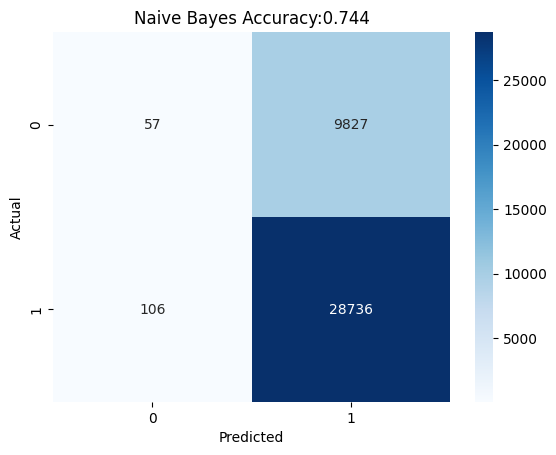

In [16]:
# display the confusion matrix graphically in light colours

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Naive Bayes Accuracy:{0:.3f}'.format(accuracy_nb))
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
# display the accuracy and classification report

print('Accuracy of Naive Bayes classifier:', accuracy_nb)
print('Classification report of Naive Bayes classifier:\n', report_nb)


Accuracy of Naive Bayes classifier: 0.7435056551154263
Classification report of Naive Bayes classifier:
               precision    recall  f1-score   support

           0       0.35      0.01      0.01      9884
           1       0.75      1.00      0.85     28842

    accuracy                           0.74     38726
   macro avg       0.55      0.50      0.43     38726
weighted avg       0.64      0.74      0.64     38726



In [18]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [19]:
# Initialize and train the Naive Bayes Classifier

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_smote, y_train_smote)

GaussianNB()

In [20]:
# Predict and evaluate

y_pred_nb_smote = nb_classifier.predict(X_test)
accuracy_nb_smote = accuracy_score(y_test, y_pred_nb_smote)
report_nb_smote = classification_report(y_test, y_pred_nb_smote)


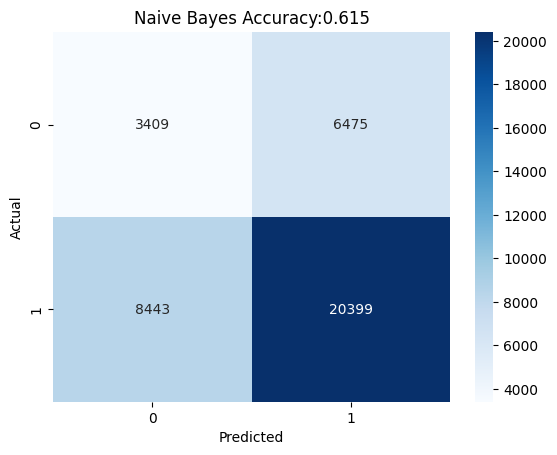

In [21]:
# display the confusion matrix graphically in light colours

plt.title('Naive Bayes Accuracy:{0:.3f}'.format(accuracy_nb_smote))
cm = confusion_matrix(y_test, y_pred_nb_smote)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [22]:
# display the accuracy and classification report

print('Accuracy of Naive Bayes classifier:', accuracy_nb_smote)
print('Classification report of Naive Bayes classifier:\n', report_nb_smote)


Accuracy of Naive Bayes classifier: 0.6147807674430615
Classification report of Naive Bayes classifier:
               precision    recall  f1-score   support

           0       0.29      0.34      0.31      9884
           1       0.76      0.71      0.73     28842

    accuracy                           0.61     38726
   macro avg       0.52      0.53      0.52     38726
weighted avg       0.64      0.61      0.63     38726

